### Import libraries and data

In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
# tv, radio, newspaper, sales
data_not_skip_header = np.genfromtxt('../data/advertising.csv', delimiter=',')
print(data_not_skip_header[:5])

[[  nan   nan   nan   nan]
 [230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3  12. ]
 [151.5  41.3  58.5  16.5]]


In [7]:
data = np.genfromtxt('../data/advertising.csv', delimiter=',', skip_header=True)
print(data[:5])

[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3  12. ]
 [151.5  41.3  58.5  16.5]
 [180.8  10.8  58.4  17.9]]


## Non-reprocessing data

In [14]:
# tv, radio, newspaper
tv_data = data[:, 0]
radio_data = data[:, 1]
newspaper_data = data[:, 2]

# sales: label
sales_data = data[:, -1]

#
print("Just get column data nothing happen for the root data")
print(f"tv = {tv_data[:5]}")
print(f"radio = {radio_data[:5]}")
print(f"newspaper = {newspaper_data[:5]}")
print(f"sales = {sales_data[:5]}")

Just get column data nothing happen for the root data
tv = [230.1  44.5  17.2 151.5 180.8]
radio = [37.8 39.3 45.9 41.3 10.8]
newspaper = [69.2 45.1 69.3 58.5 58.4]
sales = [22.1 10.4 12.  16.5 17.9]


In [ ]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_wi(x, y, y_hat):
    dwi = 2 * x * (y_hat - y)

    return dwi

def compute_gradient_b(y, y_hat):
    db = y * (y_hat - y)
    return db

def update_weight_wi(w, dw, lr=0.01):
    w = w -lr * dw
    return w

def update_weight_b(b, db, lr=0.01):
    b = b - lr * db
    return b

[Gaussian distribution](https://www.geeksforgeeks.org/python/random-gauss-function-in-python/)

Syntax:
```py
random.gauss(mu, sigma)
```

Parameters:
```
mu: mean
sigma: standard deviation
```

In [25]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

### Training process

In [ ]:
# initialize model's parameters
w1, w2, w3, b = initialize_params()
print(w1, w2, w3, b)

lr = 0.01 # 0.00001
epochs = 50
losses = []
N = len(sales_data)

for epoch in range(epochs):
    for i in range(N):
        # Take the sample i-th
        x1 = tv_data[i]
        x2 = radio_data[i]
        x3 = newspaper_data[i]
        y  = sales_data[i]

        # compute output
        y_hat = predict(x1, x2, x3, w1, w2, w3, b)

        # compute loss
        loss = compute_loss(y, y_hat)

        # compute gradient w1, w2, w3, b
        dl_dw1 = compute_gradient_wi(x1, y, y_hat)
        dl_dw2 = compute_gradient_wi(x2, y, y_hat)
        dl_dw3 = compute_gradient_wi(x3, y, y_hat)
        dl_db  = compute_gradient_b(y, y_hat)


        # update parameters
        w1 = update_weight_wi(w1, dl_dw1, lr)
        w2 = update_weight_wi(w2, dl_dw2, lr)
        w3 = update_weight_wi(w3, dl_dw3, lr)
        b  = update_weight_b(b, dl_db, lr)

        # logging
        losses.append(loss)


0.009444190415257235 -0.019380356107580734 -0.0076292716924422745 0


/tmp/ipykernel_7376/3919539327.py:5: RuntimeWarning: overflow encountered in scalar power
  return (y_hat - y) ** 2
/tmp/ipykernel_7376/3919539327.py:8: RuntimeWarning: overflow encountered in scalar multiply
  dwi = 2 * x * (y_hat - y)
/tmp/ipykernel_7376/3919539327.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  w = w -lr * dw


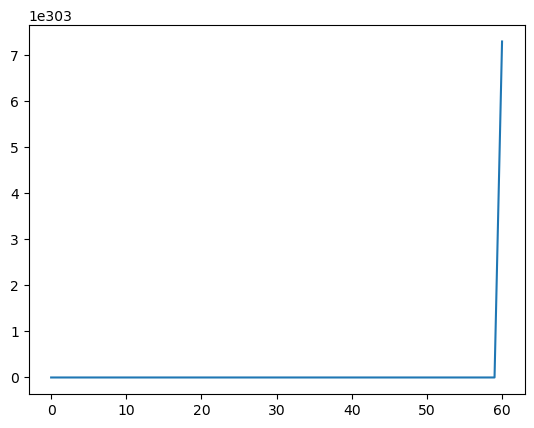

In [32]:
plt.plot(losses)
plt.show()

### Inference

In [ ]:
# get model's parameters
print(w1, w2, w3, b)

nan nan nan nan


In [ ]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is nan


In [ ]:
# [230.1, 37.8, 69.2, 22.1]

tv = 230.1
radio = 37.8
newspaper = 69.2

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

### Conclusion
The model is overflow number and cannot find the wi value. We should scale the data

## Data scaling

[Normalization](https://developers.google.com/machine-learning/crash-course/numerical-data/normalization)

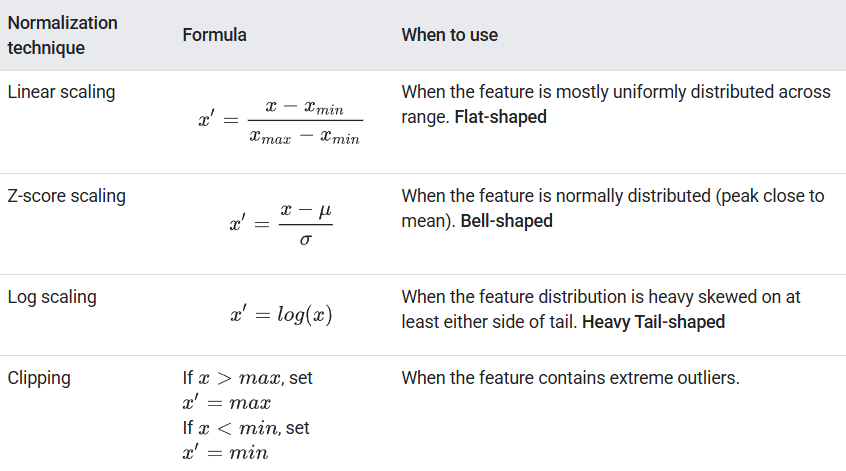

In [38]:
def linear_scaling_data(data):
    min_value = data.min()
    max_value = data.max()
    data_scaling = (data - min_value) / (max_value - min_value)
    return (data_scaling, max_value, min_value)

In [39]:
# demo
data1 = [1, 7, 5, 3]
data2 = [6, 2, 7, 4]
data3 = [7, 2, 4, 5]
data = np.array([data1, data2, data3])

print(data)

(data, max_value, min_value) = linear_scaling_data(data)
print(data)
print(max_value, min_value)

[[1 7 5 3]
 [6 2 7 4]
 [7 2 4 5]]
[[0.         1.         0.66666667 0.33333333]
 [0.83333333 0.16666667 1.         0.5       ]
 [1.         0.16666667 0.5        0.66666667]]
7 1


In [43]:
data = np.genfromtxt('../data/advertising.csv', delimiter=',', skip_header=True)
print(data[:5])

# tv, radio, newspaper
tv_data = data[:, 0]
radio_data = data[:, 1]
newspaper_data = data[:, 2]

# sales: label
sales_data = data[:, -1]

#
print("Just get column data nothing happen for the root data")
print(f"tv = {tv_data[:5]}")
print(f"radio = {radio_data[:5]}")
print(f"newspaper = {newspaper_data[:5]}")
print(f"sales = {sales_data[:5]}")

[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3  12. ]
 [151.5  41.3  58.5  16.5]
 [180.8  10.8  58.4  17.9]]
Just get column data nothing happen for the root data
tv = [230.1  44.5  17.2 151.5 180.8]
radio = [37.8 39.3 45.9 41.3 10.8]
newspaper = [69.2 45.1 69.3 58.5 58.4]
sales = [22.1 10.4 12.  16.5 17.9]


In [44]:
# scale data (only for features)
# remenber to scale input features in inference, therefore, we need to save max and min values
# normalization
sales_data = data[:, 3]
features = data[:, :3]
(features, max_v, min_v) = linear_scaling_data(features)

tv_data = features[:, 0]
radio_data = features[:, 1]
newspaper_data = features[:, 2]

print(tv_data[:5])
print(radio_data[:5])
print(newspaper_data[:5])
print(sales_data[:5])
print(max_v, min_v)

[0.77631579 0.15013495 0.05802969 0.5111336  0.6099865 ]
[0.12753036 0.13259109 0.1548583  0.13933873 0.03643725]
[0.23346829 0.15215924 0.23380567 0.19736842 0.19703104]
[22.1 10.4 12.  16.5 17.9]
296.4 0.0


### Training process

In [45]:
# initialize model's parameters
w1, w2, w3, b = initialize_params()
print(w1, w2, w3, b)

lr = 0.01 # 0.00001
epochs = 50
losses = []
N = len(sales_data)

for epoch in range(epochs):
    for i in range(N):
        # Take the sample i-th
        x1 = tv_data[i]
        x2 = radio_data[i]
        x3 = newspaper_data[i]
        y  = sales_data[i]

        # compute output
        y_hat = predict(x1, x2, x3, w1, w2, w3, b)

        # compute loss
        loss = compute_loss(y, y_hat)

        # compute gradient w1, w2, w3, b
        dl_dw1 = compute_gradient_wi(x1, y, y_hat)
        dl_dw2 = compute_gradient_wi(x2, y, y_hat)
        dl_dw3 = compute_gradient_wi(x3, y, y_hat)
        dl_db  = compute_gradient_b(y, y_hat)


        # update parameters
        w1 = update_weight_wi(w1, dl_dw1, lr)
        w2 = update_weight_wi(w2, dl_dw2, lr)
        w3 = update_weight_wi(w3, dl_dw3, lr)
        b  = update_weight_b(b, dl_db, lr)

        # logging
        losses.append(loss)


0.009096044853118953 0.009779744739998845 -0.000691735624813062 0


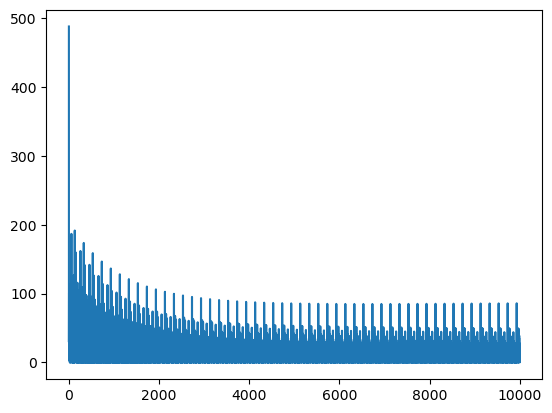

In [46]:
plt.plot(losses)
plt.show()

### Inference

In [ ]:
# [230.1, 37.8, 69.2, 22.1]

tv = 230.1
radio = 37.8
newspaper = 69.2

x_test = np.array([tv, radio, newspaper])
x_test = (x_test - min_v) / (max_v - min_v)

sales = predict(x_test[0], x_test[1], x_test[2], w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 19.03463341025487


### Conclusion
In this section, we only use linear data scaling technique for scaling data. After scaling data, we can train model and use the wi, b results to inference the result.

## Data Scaling and batch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [48]:
def linear_scaling_data(data):
    min_value = data.min()
    max_value = data.max()
    data_scaling = (data - min_value) / (max_value - min_value)
    return (data_scaling, max_value, min_value)

In [49]:
data = np.genfromtxt('../data/advertising.csv', delimiter=',', skip_header=True)
print(data[:5])

# tv, radio, newspaper
tv_data = data[:, 0]
radio_data = data[:, 1]
newspaper_data = data[:, 2]

# sales: label
sales_data = data[:, -1]

#
print("Just get column data nothing happen for the root data")
print(f"tv = {tv_data[:5]}")
print(f"radio = {radio_data[:5]}")
print(f"newspaper = {newspaper_data[:5]}")
print(f"sales = {sales_data[:5]}")

[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3  12. ]
 [151.5  41.3  58.5  16.5]
 [180.8  10.8  58.4  17.9]]
Just get column data nothing happen for the root data
tv = [230.1  44.5  17.2 151.5 180.8]
radio = [37.8 39.3 45.9 41.3 10.8]
newspaper = [69.2 45.1 69.3 58.5 58.4]
sales = [22.1 10.4 12.  16.5 17.9]


In [50]:
# scale data (only for features)
# remenber to scale input features in inference, therefore, we need to save max and min values
# normalization
sales_data = data[:, 3]
features = data[:, :3]
(features, max_v, min_v) = linear_scaling_data(features)

tv_data = features[:, 0]
radio_data = features[:, 1]
newspaper_data = features[:, 2]

print(tv_data[:5])
print(radio_data[:5])
print(newspaper_data[:5])
print(sales_data[:5])
print(max_v, min_v)

[0.77631579 0.15013495 0.05802969 0.5111336  0.6099865 ]
[0.12753036 0.13259109 0.1548583  0.13933873 0.03643725]
[0.23346829 0.15215924 0.23380567 0.19736842 0.19703104]
[22.1 10.4 12.  16.5 17.9]
296.4 0.0


### Training process

In [ ]:
# initialize model's parameters
w1, w2, w3, b = initialize_params()
print(w1, w2, w3, b)

lr = 0.01 # 0.00001
epochs = 50
losses = []
N = len(sales_data)

for epoch in range(epochs):
    epoch_losses = []
    dw1_total = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    db_total  = 0.0
    for i in range(N):
        # Take the sample i-th
        x1 = tv_data[i]
        x2 = radio_data[i]
        x3 = newspaper_data[i]
        y  = sales_data[i]

        # compute output
        y_hat = predict(x1, x2, x3, w1, w2, w3, b)

        # compute loss
        loss = compute_loss(y, y_hat)
        # logging
        epoch_losses.append(loss)

        # compute gradient w1, w2, w3, b
        dl_dw1 = compute_gradient_wi(x1, y, y_hat)
        dl_dw2 = compute_gradient_wi(x2, y, y_hat)
        dl_dw3 = compute_gradient_wi(x3, y, y_hat)
        dl_db  = compute_gradient_b(y, y_hat)

        # accumulate
        dw1_total = dw1_total + dl_dw1
        dw2_total = dw2_total + dl_dw2
        dw3_total = dw3_total + dl_dw3
        db_total = db_total + dl_db


    # update parameters
    w1 = update_weight_wi(w1, dw1_total / N, lr)
    w2 = update_weight_wi(w2, dw2_total / N, lr)
    w3 = update_weight_wi(w3, dw3_total / N, lr)
    b  = update_weight_b(b, db_total / N, lr)

    losses.append(np.sum(epoch_losses)/ len(epoch_losses))



0.006283286843443179 0.019091671231223826 -0.003629032255676934 0


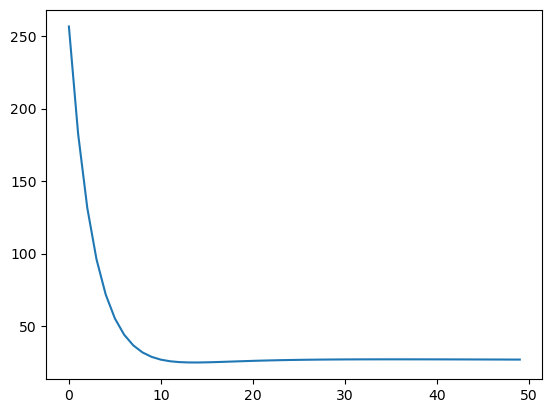

In [59]:
plt.plot(losses)
plt.show()

### Inference

In [60]:
# [230.1, 37.8, 69.2, 22.1]

tv = 230.1
radio = 37.8
newspaper = 69.2

x_test = np.array([tv, radio, newspaper])
x_test = (x_test - min_v) / (max_v - min_v)

sales = predict(x_test[0], x_test[1], x_test[2], w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 17.29026895268408


### Conclusion